In [2]:
import time
import datetime
import numpy as np
import pandas as pd
from itertools import product
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
sales = pd.read_csv("/Users/roblespaeza96/Desktop/DT Certificate /Caps/capstone-project/sales_train.csv")
item_cat = pd.read_csv("/Users/roblespaeza96/Desktop/DT Certificate /Caps/capstone-project/item_categories.csv")
items = pd.read_csv("/Users/roblespaeza96/Desktop/DT Certificate /Caps/capstone-project/items.csv")
shop = pd.read_csv("/Users/roblespaeza96/Desktop/DT Certificate /Caps/capstone-project/shops.csv")
test = pd.read_csv("/Users/roblespaeza96/Desktop/DT Certificate /Caps/capstone-project/test.csv")
result = pd.read_csv("/Users/roblespaeza96/Desktop/DT Certificate /Caps/capstone-project/results - results.csv")

In [4]:
df1 = test.merge(result, left_on = 'ID', right_on = 'id')

In [5]:
df1.head()

,ID,shop_id,item_id,id,item_cnt_month
0,0,5,5037,0,0.5
1,1,5,5320,1,0.5
2,2,5,5233,2,0.5
3,3,5,5232,3,0.5
4,4,5,5268,4,0.5


In [6]:
df1.drop(['ID'], axis = 1)
df1.rename(columns={"id": "ID"})
df1 = df1[["ID", "shop_id", "item_id","item_cnt_month"]]

In [7]:
df1['item_cnt_month'] = round(df1['item_cnt_month'], 2)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214200 entries, 0 to 214199
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              214200 non-null  int64  
 1   shop_id         214200 non-null  int64  
 2   item_id         214200 non-null  int64  
 3   item_cnt_month  214200 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 8.2 MB


In [9]:
df_sum = df1.groupby(by = ['shop_id'])['item_cnt_month'].sum()
df_sum = df_sum.reset_index()

In [10]:
df_sum = df_sum.sort_values(by = 'item_cnt_month', ascending = False)

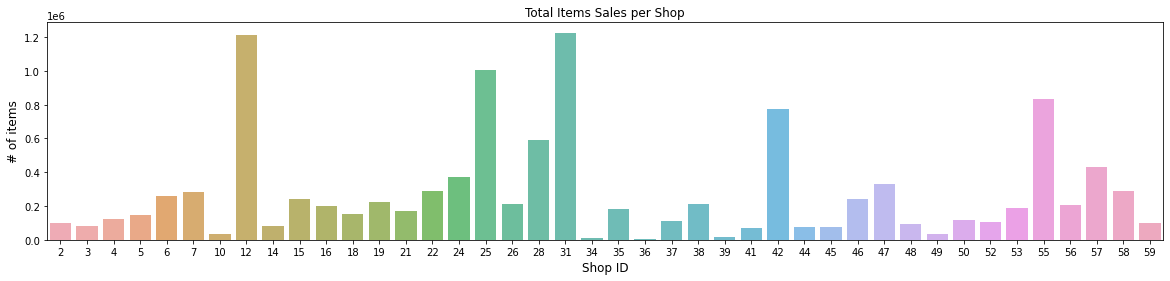

In [11]:
# plot
plt.figure(figsize=(20,4))
ax=sns.barplot(df_sum.shop_id, df_sum.item_cnt_month, alpha=0.8)
plt.title("Total Items Sales per Shop")
plt.ylabel("# of items", fontsize=12)
plt.xlabel("Shop ID", fontsize=12)
plt.show()

** Grafico del total de items vendidos por shop_id para el mes 34. Como podemos notar tenemos un top 3 con el mes 12,25,31. Esto nos va a dar una primera visualizacion de que como se esta moviendo las ventas. Podemos investigar mas a fondo y definir que productos son los mas vendidos dentre del top 3 tiendas 

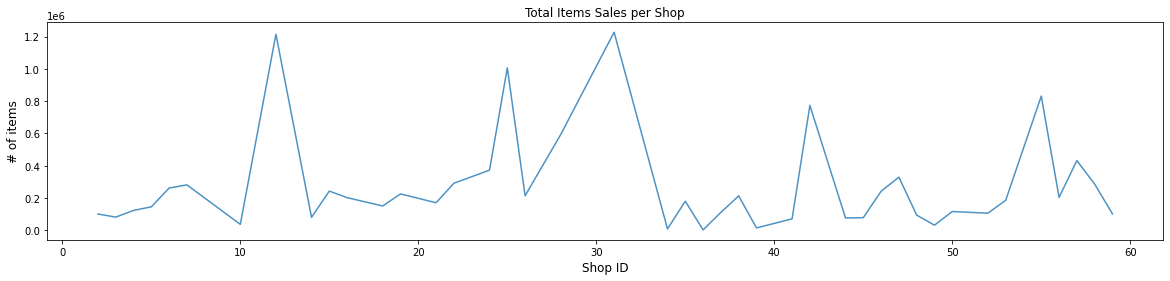

In [12]:
# plot
plt.figure(figsize=(20,4))
ax=sns.lineplot(df_sum.shop_id, df_sum.item_cnt_month, alpha=0.8)
plt.title("Total Items Sales per Shop")
plt.ylabel("# of items", fontsize=12)
plt.xlabel("Shop ID", fontsize=12)
plt.show()

In [13]:
df_litem = df1.groupby(['shop_id'])['item_cnt_month'].nlargest(5)
df_litem = df_litem.reset_index()
df_litem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   shop_id         210 non-null    int64  
 1   level_1         210 non-null    int64  
 2   item_cnt_month  210 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 5.0 KB


In [14]:
df_litem = df_litem.merge(df1, left_on = ['shop_id','item_cnt_month'], right_on= ['shop_id','item_cnt_month'])
df_litem = df_litem.drop(['level_1','ID'], axis = 1)


In [15]:
df_litem.head()

,shop_id,item_cnt_month,item_id
0,2,12618.09,17717
1,2,6659.09,22102
2,2,6172.89,7956
3,2,4093.17,16843
4,2,3761.37,4870


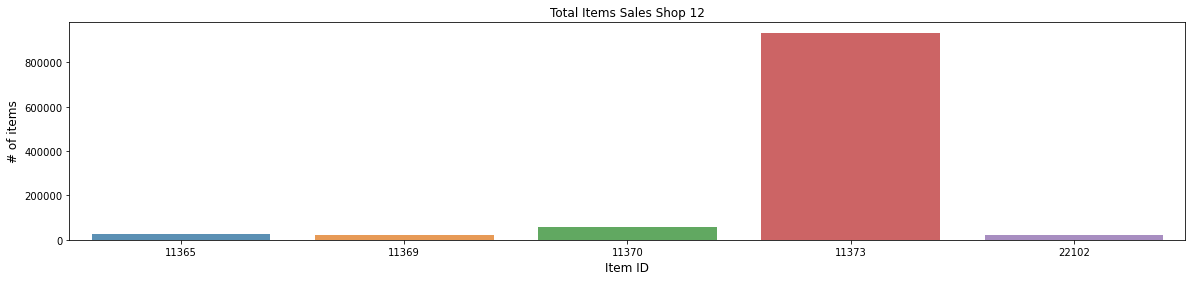

In [16]:
df_12 = df_litem.loc[df_litem['shop_id'] == 12]
# plot
plt.figure(figsize=(20,4))
ax=sns.barplot(df_12.item_id, df_12.item_cnt_month, alpha=0.8)
plt.title("Total Items Sales Shop 12")
plt.ylabel("# of items", fontsize=12)
plt.xlabel("Item ID", fontsize=12)
plt.show()

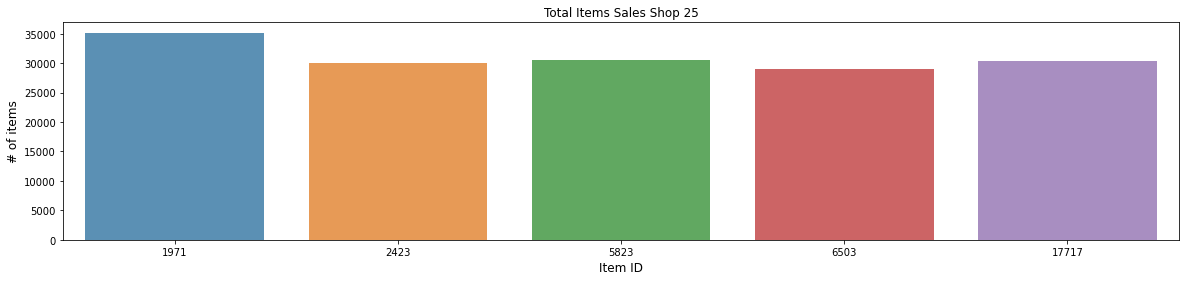

In [17]:
df_25 = df_litem.loc[df_litem['shop_id'] == 25]
# plot
plt.figure(figsize=(20,4))
ax=sns.barplot(df_25.item_id, df_25.item_cnt_month, alpha=0.8)
plt.title("Total Items Sales Shop 25")
plt.ylabel("# of items", fontsize=12)
plt.xlabel("Item ID", fontsize=12)
plt.show()

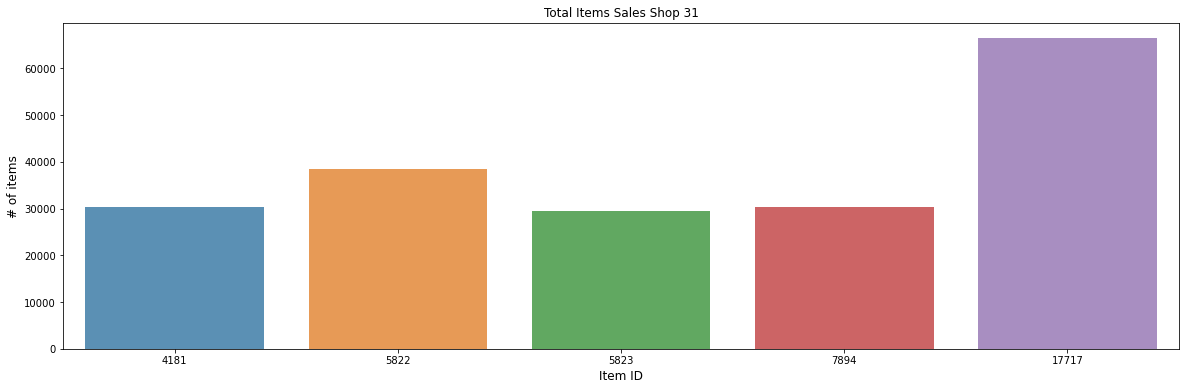

In [18]:
df_31 = df_litem.loc[df_litem['shop_id'] == 31]
# plot
plt.figure(figsize=(20,6))
ax=sns.barplot(df_31.item_id, df_31.item_cnt_month, alpha=0.8)
plt.title("Total Items Sales Shop 31")
plt.ylabel("# of items", fontsize=12)
plt.xlabel("Item ID", fontsize=12)
plt.show()

In [19]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [20]:
sales_1 = sales[(sales['date_block_num'] == 9) | (sales['date_block_num'] == 10) | (sales['date_block_num'] == 21) | (sales['date_block_num'] == 22)| (sales['date_block_num'] == 33)]

In [21]:
sales_train = sales.groupby(['date_block_num'])['item_price'].mean().reset_index()

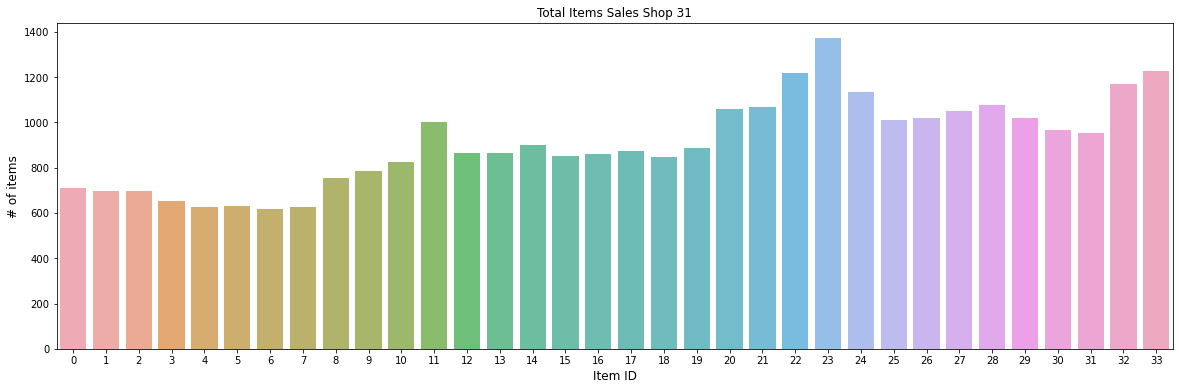

In [22]:
# plot
plt.figure(figsize=(20,6))
ax=sns.barplot(sales_train.date_block_num, sales_train.item_price, alpha=0.8)
plt.title("Total Items Sales Shop 31")
plt.ylabel("# of items", fontsize=12)
plt.xlabel("Item ID", fontsize=12)
plt.show()

In [23]:
sales_1.groupby(['date_block_num'])['item_price'].mean().reset_index()

,date_block_num,item_price
0,9,784.643328
1,10,822.949879
2,21,1069.659029
3,22,1218.873700
4,33,1224.574825


In [24]:
# de 9 a 10     4.88%
# de 21 a 22    13.95%

#9.42%

In [31]:
df_33 = sales[sales['date_block_num'] == 33]
df_33 = df_33.groupby(['shop_id'])['item_cnt_day'].sum().reset_index()

In [32]:
df_33.head()

,shop_id,item_cnt_day
0,2,727.0
1,3,613.0
2,4,831.0
3,5,1052.0
4,6,1802.0


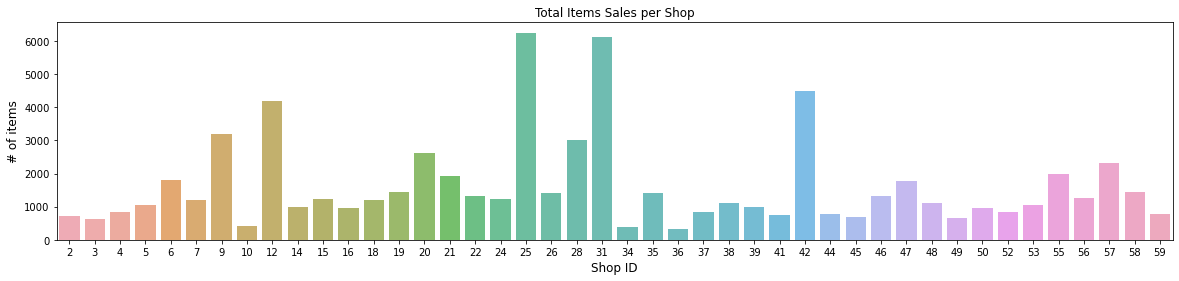

In [33]:
# plot
plt.figure(figsize=(20,4))
ax=sns.barplot(df_33.shop_id, df_33.item_cnt_day, alpha=0.8)
plt.title("Total Items Sales per Shop")
plt.ylabel("# of items", fontsize=12)
plt.xlabel("Shop ID", fontsize=12)
plt.show()